In [2]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

from scipy import misc

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

(-0.5, 779.5, 779.5, -0.5)

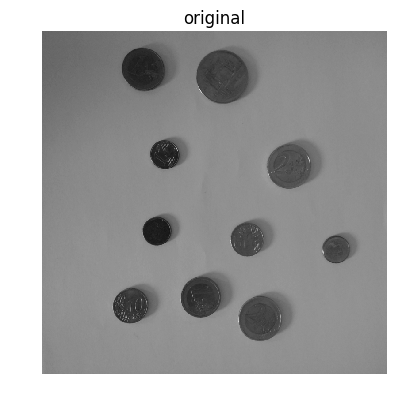

In [59]:
coins_im=img_as_ubyte(rgb2gray(imread('./images/coins.jpg'))) #open the image as a grey ubyte

coins_im=misc.imresize(coins_im,25) #resize the image at 25%

plt.figure()
imshow(coins_im)
plt.title('original')
plt.axis('off')


Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

(-0.5, 779.5, 779.5, -0.5)

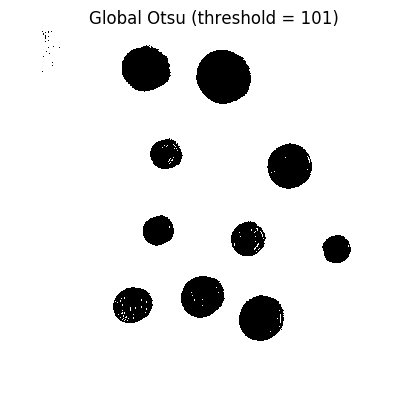

In [60]:

from skimage import data
from skimage.filters import threshold_otsu, rank

threshold_global_otsu = threshold_otsu(coins_im) #find Otsu threshold
global_otsu = coins_im >= threshold_global_otsu #binarize the image by seeting to 0 the value above the Otsu thresholding and to 255 the others 

plt.figure()
imshow(global_otsu, cmap=plt.cm.gray)
plt.title('Global Otsu (threshold = %d)' % threshold_global_otsu)
plt.axis('off')

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

(0.0, 1.0, 0.0, 1.0)

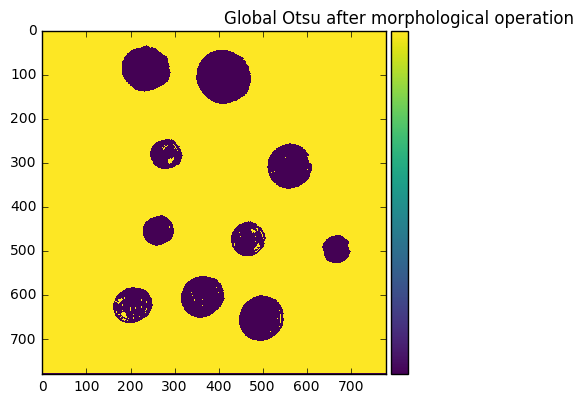

In [63]:

plt.figure()


open_im=morphology.binary_dilation(global_otsu).astype(np.uint8) #to fill the hole we expand the coins

open_im=morphology.binary_dilation(open_im).astype(np.uint8)#again

open_im=morphology.binary_erosion(open_im).astype(np.uint8)#We erode the coins to get them back to their original size

open_im=morphology.binary_erosion(open_im).astype(np.uint8)#We erode the coins to get them back to their original size



imshow(open_im)
plt.title('Global Otsu after morphological operation')
plt.axis('off')
#o we first dilate the white part  to make noise disapear then we erode it to get back to
#the original coins size

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

number of objects : 11
radius of the  1  region :  3106.0  pixels
radius of the  2  region :  182.773123959  pixels
radius of the  3  region :  210.258405333  pixels
radius of the  4  region :  205.660948597  pixels
radius of the  5  region :  212.693434176  pixels
radius of the  6  region :  126.882250994  pixels
radius of the  7  region :  299.676190233  pixels
radius of the  8  region :  110.518289963  pixels
radius of the  9  region :  241.036579926  pixels
radius of the  10  region :  422.419353931  pixels
radius of the  11  region :  238.021861301  pixels


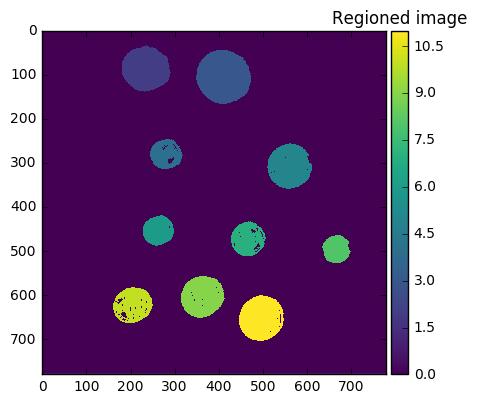

In [62]:

from skimage.measure import label


[label_im,label_num]=label(open_im,background = True, return_num = True) #label the regions 

region_pro=regionprops(label_im,intensity_image=None, cache=True)#extract the property of each region (size,area ...)


print ("number of objects :",label_num) #print the number of region (number of object + backgroung)

number=0
for region in region_pro:
       number=number+1
       print("radius of the ", number , " region : ", region.perimeter/2 ," pixels") #print the perimeter of each regions

plt.figure
imshow(label_im) #show the labelled image
plt.title("Regioned image")


## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

the number of objects is :  11


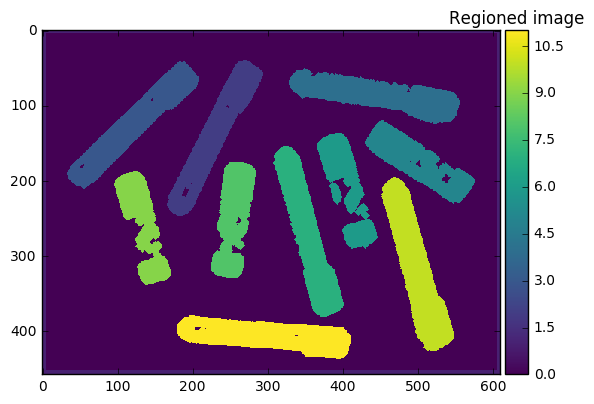

In [53]:
from scipy import ndimage
from skimage import morphology

obj_im=img_as_ubyte(rgb2gray(imread('./images/objets4.jpg'))) #load the image

threshold_global_otsu = threshold_otsu(obj_im) #find the Otsu threshold
global_otsu = obj_im >= threshold_global_otsu  #binarize the image with the Otsu threshold
        
#the following apply 5 consecutive erosion to fill the gap created by the pen s labels    
open_im=morphology.binary_erosion(global_otsu).astype(np.uint8) 
for i in range (0,4):
    open_im=morphology.binary_erosion(open_im).astype(np.uint8)

    
    
[label_im,label_num]=label(open_im,background = True, return_num = True) #label each region

plt.figure
imshow(label_im) #show the labelled image
plt.title("Regioned image")

print ('the number of objects is : ', label_num)